
## Project overview
Healthcare is vital for individuals and society, as it promotes well-being, prevents diseases,promoting health equity and many more.

This  project is crucial for creating healthier societies and fostering a culture of proactive health management.

## Business understanding
#### Problem statement
Develop a recommendetion system for exercise intensity that provides personalized recommendations on appropriate workout intensities based on individual characteristics, including age, gender, BMI, exercise duration, heart rate, calories burned, weather conditions, and desired weight goals. The goal is to guide individuals in selecting exercise intensities that optimize their fitness outcomes, taking into account their specific attributes and preferences.
#### Business Understanding
In today's thriving fitness and wellness industry, the development of a recommender system for exercise intensity presents valuable business opportunities. Fitness centers, gyms, and personal trainers can leverage this system to offer tailored workout programs that align with individual goals, preferences, and fitness levels, ultimately attracting and retaining members. Wellness apps and platforms can integrate the recommender system to deliver personalized exercise recommendations, enhancing the user experience and setting them apart from competitors. Healthcare providers can utilize the system to promote physical activity as a means of disease prevention and management, while corporate wellness programs can leverage it to support employee well-being and productivity. By incorporating an exercise intensity recommender system, businesses can optimize workout effectiveness, increase customer satisfaction, and differentiate their offerings in a competitive market.

#### Objectives
Overall Objective: Develop a Recommender System for Personalized Exercise Intensity

1. To personalize exercise intensity recommendations. Build a recommendation system based on individual characteristics such as age, gender, body mass index (BMI), exercise duration, heart rate, calories burned, weather conditions, and desired weight goals.
2. Develop a model that can predict the optimal exercise intensity for a given individual. 
3. Identify the factors that contribute to optimal exercise intensity.
4. To develop a recommender system that can dynamically adjust exercise intensity recommendations based on changing weather conditions. The system should consider the impact of different weather conditions on workout performance and suggest appropriate exercise intensities accordingly

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
df1=pd.read_csv("exercise_dataset.csv")
df1

,ID,Exercise,Calories Burn,Dream Weight,Actual Weight,Age,Gender,Duration,Heart Rate,BMI,Weather Conditions,Exercise Intensity
0,1,Exercise 2,286.959851,91.892531,96.301115,45.0,Male,37.0,170.0,29.426275,Rainy,5.0
1,2,Exercise 7,343.453036,64.165097,61.104668,25.0,Male,43.0,142.0,21.286346,Rainy,5.0
2,3,Exercise 4,261.223465,70.846224,71.766724,20.0,Male,20.0,148.0,27.899592,Cloudy,4.0
3,4,Exercise 5,127.183858,79.477008,82.984456,33.0,Male,39.0,170.0,33.729552,Sunny,10.0
4,5,Exercise 10,416.318374,89.960226,85.643174,29.0,Female,34.0,118.0,23.286113,Cloudy,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
100063,100064,Exercise 2,205.872575,80.355223,70.516820,22.0,Female,48.0,153.0,63.267795,Cloudy,3.0
100064,100065,Exercise 2,294.547811,98.703186,NaN,22.0,Male,53.0,148.0,51.359265,Cloudy,4.0
100065,100066,Exercise 2,258.779574,91.311974,84.096481,54.0,Male,35.0,166.0,61.164229,Cloudy,9.0
100066,100067,Exercise 3,269.916192,94.630249,85.552996,28.0,Male,55.0,NaN,39.910834,Rainy,5.0


In [26]:
#import pandas as pd
#from pandas_profiling import ProfileReport

# Load the dataset
#data = pd.read_csv('exercise_dataset.csv')

# Generate the profile report
#profile = ProfileReport(data)

# Save the report to an HTML file
#profile.to_file('report.html')


In [27]:
# A function to print the shape of our datasets
def print_dataset_shape(*datasets):
    """
    Prints the shape of one or more datasets (number of rows and columns).
    Assumes datasets are in a Pandas DataFrame format.
    """
    for idx, dataset in enumerate(datasets):
        print(f"Dataset {idx + 1} - Number of rows: {dataset.shape[0]}")
        print(f"Dataset {idx + 1} - Number of columns: {dataset.shape[1]}")
# print the shape of our dataset
print_dataset_shape(df1)

Dataset 1 - Number of rows: 100068
Dataset 1 - Number of columns: 12


In [28]:
# Function to display the head of our datasets
def display_data_head(df1):
    dfs = [df1.head()]
    df_names = ["data"]
    for df, name in zip(dfs, df_names): 
        print(f"\n{name}:\n")
        display(df)
# Display the head of our datasets
display_data_head(df1)


data:



,ID,Exercise,Calories Burn,Dream Weight,Actual Weight,Age,Gender,Duration,Heart Rate,BMI,Weather Conditions,Exercise Intensity
0,1,Exercise 2,286.959851,91.892531,96.301115,45.0,Male,37.0,170.0,29.426275,Rainy,5.0
1,2,Exercise 7,343.453036,64.165097,61.104668,25.0,Male,43.0,142.0,21.286346,Rainy,5.0
2,3,Exercise 4,261.223465,70.846224,71.766724,20.0,Male,20.0,148.0,27.899592,Cloudy,4.0
3,4,Exercise 5,127.183858,79.477008,82.984456,33.0,Male,39.0,170.0,33.729552,Sunny,10.0
4,5,Exercise 10,416.318374,89.960226,85.643174,29.0,Female,34.0,118.0,23.286113,Cloudy,3.0


In [29]:
#checking info of data
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100068 entries, 0 to 100067
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ID                  100068 non-null  int64  
 1   Exercise            100068 non-null  object 
 2   Calories Burn       90203 non-null   float64
 3   Dream Weight        90423 non-null   float64
 4   Actual Weight       90383 non-null   float64
 5   Age                 90428 non-null   float64
 6   Gender              90307 non-null   object 
 7   Duration            90595 non-null   float64
 8   Heart Rate          90375 non-null   float64
 9   BMI                 90631 non-null   float64
 10  Weather Conditions  90580 non-null   object 
 11  Exercise Intensity  90410 non-null   float64
dtypes: float64(8), int64(1), object(3)
memory usage: 9.2+ MB


In [30]:
# A function to check for duplicates in our datasets
def check_duplicates(df):
    """
    This function checks for and returns any duplicates in a given dataframe.
    """
    duplicates = df[df.duplicated()]
    if duplicates.shape[0] == 0:
        print("No duplicates found in the dataset")
    else:
        print("Duplicates found in the dataset:")
        return duplicates
# Calling for the function to check for duplicates
check_duplicates(df1)

No duplicates found in the dataset


In [31]:
df1.columns

Index(['ID', 'Exercise', 'Calories Burn', 'Dream Weight', 'Actual Weight',
       'Age', 'Gender', 'Duration', 'Heart Rate', 'BMI', 'Weather Conditions',
       'Exercise Intensity'],
      dtype='object')

## Missing Values

In [32]:
# A function to check for missing values in our dataset
def check_missing_values(data):
    # Count missing values in each column
    missing_values = data.isnull().sum()

    # Convert missing values count to percentage of total rows
    missing_percent = (missing_values / len(data)) * 100

    # Combine the missing values count and percent into a DataFrame
    missing_df = pd.concat([missing_values, missing_percent], axis=1)
    missing_df.columns = ['Missing Values', '% of Total']
# Return only columns with missing values
    missing_df = missing_df[missing_df['Missing Values'] > 0]

    return missing_df

# Check missing values in each dataset
display(check_missing_values(df1))

,Missing Values,% of Total
Calories Burn,9865,9.858296
Dream Weight,9645,9.638446
Actual Weight,9685,9.678419
Age,9640,9.633449
Gender,9761,9.754367
Duration,9473,9.466563
Heart Rate,9693,9.686413
BMI,9437,9.430587
Weather Conditions,9488,9.481553
Exercise Intensity,9658,9.651437


Calories Burn, Dream Weight, Actual Weight, Duration,Heart Rate,Age, BMI, contains missing values and we will fill with mean.

In [33]:
# Fill missing values with the respective column's mean
# Calories Burn, Dream Weight, Actual Weight, Duration, Heart Rate, Age, BMI, Exercise Intensity

# Calculate the mean for each column
mean_values = df1.mean()
df1['Calories Burn'].fillna(mean_values['Calories Burn'], inplace=True)
df1['Dream Weight'].fillna(mean_values['Dream Weight'], inplace=True)
df1['Actual Weight'].fillna(mean_values['Actual Weight'], inplace=True)
df1['Duration'].fillna(mean_values['Duration'], inplace=True)
df1['Heart Rate'].fillna(mean_values['Heart Rate'], inplace=True)
df1['Age'].fillna(mean_values['Age'], inplace=True)
df1['BMI'].fillna(mean_values['BMI'], inplace=True)


C:\Users\Susan\AppData\Local\Temp\ipykernel_7084\2925846034.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_values = df1.mean()


Gender and Weather condition will use foward fill respectively

In [34]:
df1['Gender'].ffill(inplace=True)
df1['Weather Conditions'].ffill(inplace=True)
df1['Exercise Intensity'].ffill(inplace=True)


In [35]:
# Check missing values in each dataset
display(check_missing_values(df1))

,Missing Values,% of Total


In [36]:
# check the unique variables for each category.
for col in df1.columns:
    print('\n' + col + '\n')
    print(df1[col].value_counts())


ID

1         1
66697     1
66719     1
66718     1
66717     1
         ..
33354     1
33353     1
33352     1
33351     1
100068    1
Name: ID, Length: 100068, dtype: int64

Exercise

Exercise 10    10127
Exercise 2     10105
Exercise 1     10070
Exercise 5     10048
Exercise 7     10009
Exercise 9      9993
Exercise 8      9991
Exercise 3      9927
Exercise 6      9921
Exercise 4      9877
Name: Exercise, dtype: int64

Calories Burn

252.091198    9865
286.959851       1
201.563102       1
298.003933       1
237.716666       1
              ... 
222.352539       1
279.495567       1
254.914943       1
218.062425       1
269.265321       1
Name: Calories Burn, Length: 90204, dtype: int64

Dream Weight

89.388573    9645
91.892531       1
81.326428       1
93.030209       1
81.030585       1
             ... 
92.660793       1
90.041878       1
92.719596       1
87.799283       1
87.741370       1
Name: Dream Weight, Length: 90424, dtype: int64

Actual Weight

79.793092    9685
96.30

## EDA

In [37]:
#import matplotlib
#matplotlib.use('TkAgg')


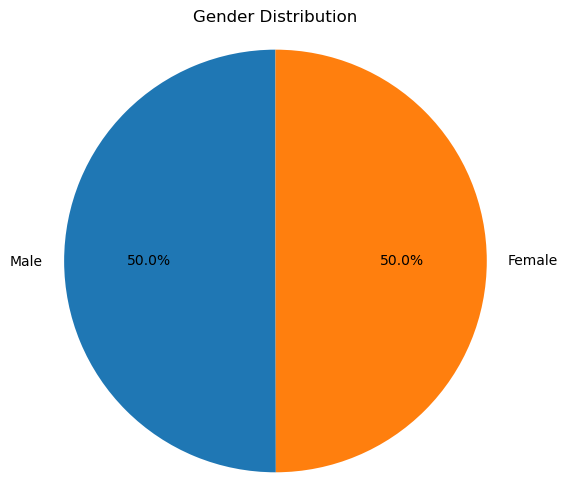

In [38]:
# Group the data by 'Gender' and get the valuecount 
gender_counts = df1['Gender'].value_counts()

#pie chart
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.axis('equal')  
plt.show()

In [39]:
# function to plot bar plots for various variables(categorical variables)
def create_bar_plot(data, variable):
    
    # frequency Distribution of eachvariable
    variable_counts = data[variable].value_counts()
    
    # Create the bar plot
    plt.figure(figsize=(12, 6))
    variable_counts.plot(kind='bar')
    plt.title(f'Frequency Distribution of {variable}')
    plt.xlabel(variable)
    plt.ylabel('Frequency')
    plt.xticks(rotation=0)
    plt.show()

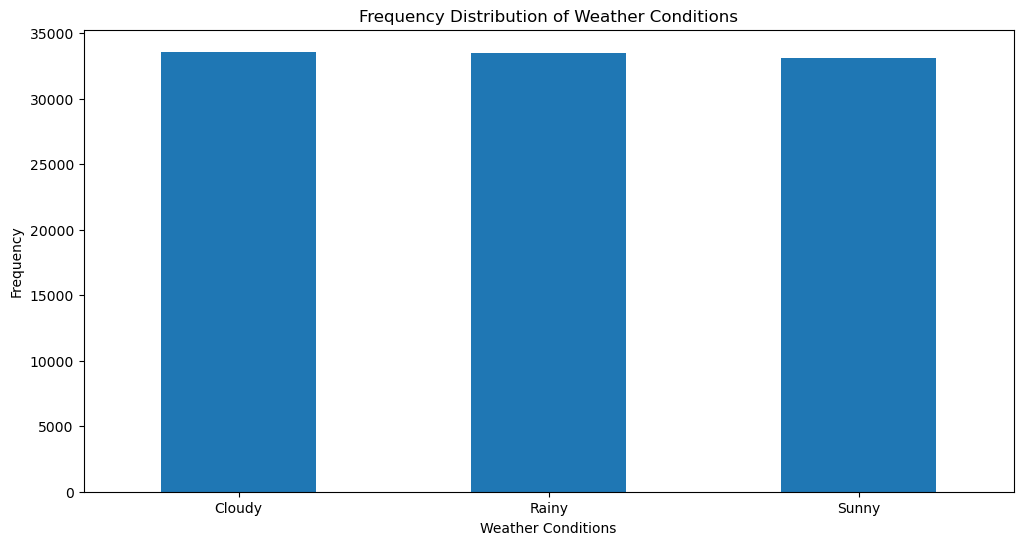

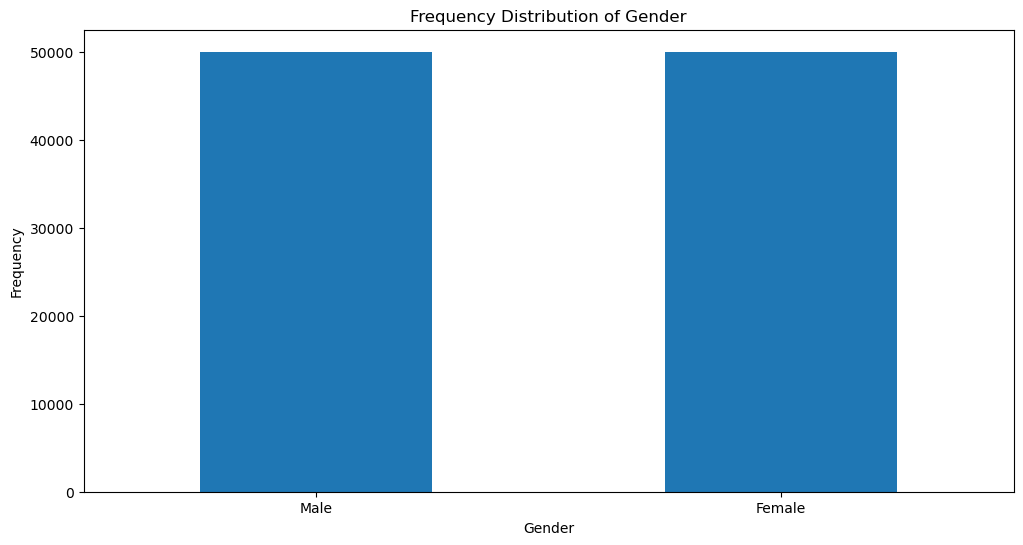

In [40]:
# bar plot for weather conditions
create_bar_plot(df1, 'Weather Conditions')
# bar plot for Gender
create_bar_plot(df1, 'Gender')